# Anfis 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, 'code/')
from anfis import ANFIS, predict
import membershipfunction

In [2]:
def doAnfis(X_train, X_test, Y_train, Y_test, epochs, mf):
    # Define the membership functions for each feature
    
    # Initialize Membership functions and ANFIS
    mfc = membershipfunction.MemFuncs(mf)
    anf = ANFIS(X_train, Y_train, mfc)
    
    # Train the ANFIS model
    anf.trainHybridJangOffLine(epochs=epochs)
    
    # Make predictions on the test set
    predictions = predict(anf, X_test)
    
    # Post-process predictions to match Y_train/Y_test dimensions
    # Rounding predictions to the nearest integer as the output should be categorical
    predictions_rounded = np.rint(predictions).astype(int).flatten()
    
    # Ensure predictions are within the valid label range
    min_label = Y_train.min()
    max_label = Y_train.max()
    predictions_clipped = np.clip(predictions_rounded, min_label, max_label)
    
    # Accuracy calculation
    accuracy = accuracy_score(Y_test, predictions_clipped)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Optionally, plot errors and results
    anf.plotErrors()
    anf.plotResults()
    
    return anf, predictions_clipped

In [3]:
processed_data = pd.read_csv('anfis_input.csv')
print("Data loaded")

# Features to keep for the fuzzy system
to_keep = ['obj_score', 'joy_score', 'sadness_mei', 'vader_neg', 'vader_neu', 'vader_pos']

# Subset the dataframe for input features
fuzzy_data = processed_data[to_keep]

# Mapping the target variable (Emotion) to numeric values
mapping_dict = {value: index for index, value in enumerate(processed_data['Emotion'].unique())}
processed_data['Emotion_mapped'] = processed_data['Emotion'].map(mapping_dict)

# Input (X) and Target (Y) variables
X = fuzzy_data.values
Y = processed_data['Emotion_mapped'].values

# Split the data into training and testing sets using train_test_split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

Data loaded


Processing:   0%|          | 0/100 [00:00<?, ?it/s]

current error: 3112.9875608831944


Processing:   1%|          | 1/100 [00:53<1:28:27, 53.61s/it]

current error: 3110.8478497981173


Processing:   2%|▏         | 2/100 [01:48<1:28:57, 54.46s/it]

current error: 3107.3685996029753


Processing:   3%|▎         | 3/100 [02:42<1:27:37, 54.20s/it]

current error: 3095.613922906943


Processing:   4%|▍         | 4/100 [03:36<1:26:38, 54.15s/it]

current error: 3061.271507846387


Processing:   5%|▌         | 5/100 [04:32<1:26:26, 54.59s/it]

current error: 3055.068207086483


Processing:   6%|▌         | 6/100 [05:26<1:25:14, 54.41s/it]

current error: 3051.3182618131345


Processing:   7%|▋         | 7/100 [06:20<1:24:08, 54.28s/it]

current error: 3048.8598201029436


Processing:   8%|▊         | 8/100 [07:14<1:23:31, 54.47s/it]

current error: 3047.1995686476735


Processing:   9%|▉         | 9/100 [08:08<1:22:21, 54.31s/it]

current error: 3046.1178072041794


Processing:  10%|█         | 10/100 [09:03<1:21:41, 54.46s/it]

current error: 3045.4920398393433


Processing:  11%|█         | 11/100 [09:57<1:20:36, 54.34s/it]

current error: 3045.1880724996904


Processing:  12%|█▏        | 12/100 [10:51<1:19:32, 54.23s/it]

current error: 3045.0380864660196


Processing:  13%|█▎        | 13/100 [11:45<1:18:32, 54.17s/it]

current error: 3044.709439578326


Processing:  14%|█▍        | 14/100 [12:39<1:17:32, 54.10s/it]

current error: 3042.1089469596736


Processing:  15%|█▌        | 15/100 [13:34<1:16:46, 54.19s/it]

current error: 3042.2713891855497


Processing:  16%|█▌        | 16/100 [14:28<1:15:51, 54.18s/it]

current error: 3039.9405994218732


Processing:  17%|█▋        | 17/100 [15:23<1:15:13, 54.37s/it]

current error: 3051.0137521261995


Processing:  18%|█▊        | 18/100 [16:17<1:14:18, 54.37s/it]

current error: 3039.5477795214965


Processing:  19%|█▉        | 19/100 [17:13<1:14:11, 54.96s/it]

current error: 3062.5057760421714


Processing:  20%|██        | 20/100 [18:09<1:13:34, 55.19s/it]

current error: 3065.1735831390642


Processing:  21%|██        | 21/100 [19:03<1:12:10, 54.82s/it]

current error: 3067.5473562444267


Processing:  22%|██▏       | 22/100 [19:57<1:10:53, 54.54s/it]

current error: 3069.668888791791


Processing:  23%|██▎       | 23/100 [20:51<1:09:44, 54.35s/it]

current error: 3071.5687259978454


Processing:  24%|██▍       | 24/100 [21:45<1:08:42, 54.25s/it]

current error: 3073.256894534149


Processing:  25%|██▌       | 25/100 [22:39<1:07:40, 54.14s/it]

current error: 3074.6625417921086


Processing:  26%|██▌       | 26/100 [23:33<1:06:40, 54.06s/it]

current error: 3074.0074458400195


Processing:  27%|██▋       | 27/100 [24:26<1:05:40, 53.98s/it]

current error: 3073.3196278216087


Processing:  28%|██▊       | 28/100 [25:20<1:04:45, 53.97s/it]

current error: 3074.3701803963004


Processing:  29%|██▉       | 29/100 [26:15<1:04:02, 54.11s/it]

current error: 3077.301903074276


Processing:  30%|███       | 30/100 [27:14<1:04:48, 55.55s/it]

current error: 3081.2215681374896


Processing:  31%|███       | 31/100 [28:08<1:03:35, 55.29s/it]

current error: 3095.8776169411904


Processing:  32%|███▏      | 32/100 [29:02<1:02:11, 54.87s/it]

current error: 3095.4014923307523


Processing:  33%|███▎      | 33/100 [29:57<1:01:24, 55.00s/it]

current error: 3077.8634523268656


Processing:  34%|███▍      | 34/100 [30:52<1:00:27, 54.96s/it]

current error: 3078.8071840551765


Processing:  35%|███▌      | 35/100 [31:47<59:20, 54.77s/it]  

current error: 3079.579363438969


Processing:  36%|███▌      | 36/100 [32:40<58:04, 54.45s/it]

current error: 3080.1725420071425


Processing:  37%|███▋      | 37/100 [33:34<56:57, 54.24s/it]

current error: 3080.576953905181


Processing:  38%|███▊      | 38/100 [34:29<56:09, 54.35s/it]

current error: 3080.783588217484


Processing:  39%|███▉      | 39/100 [35:23<55:11, 54.29s/it]

current error: 3080.7957505394975


Processing:  40%|████      | 40/100 [36:17<54:16, 54.28s/it]

current error: 3080.707375109376


Processing:  41%|████      | 41/100 [37:11<53:13, 54.13s/it]

current error: 3080.484534238903


Processing:  42%|████▏     | 42/100 [38:06<52:33, 54.36s/it]

current error: 3081.2426312942243


Processing:  43%|████▎     | 43/100 [39:00<51:31, 54.23s/it]

current error: 3080.465255169648


Processing:  44%|████▍     | 44/100 [39:54<50:37, 54.24s/it]

current error: 3081.149093266131


Processing:  45%|████▌     | 45/100 [40:48<49:33, 54.06s/it]

current error: 3080.4435974668777


Processing:  46%|████▌     | 46/100 [41:42<48:51, 54.28s/it]

current error: 3081.1261389913543


Processing:  47%|████▋     | 47/100 [42:36<47:47, 54.11s/it]

current error: 3080.4170622094803


Processing:  48%|████▊     | 48/100 [43:30<46:48, 54.01s/it]

current error: 3081.0987277421737


Processing:  49%|████▉     | 49/100 [44:24<46:02, 54.16s/it]

current error: 3080.386613471712


Processing:  50%|█████     | 50/100 [45:18<45:02, 54.04s/it]

current error: 3081.0676940826893


Processing:  51%|█████     | 51/100 [46:13<44:12, 54.13s/it]

current error: 3080.3528925137134


Processing:  52%|█████▏    | 52/100 [47:07<43:19, 54.16s/it]

current error: 3081.0335859037723


Processing:  53%|█████▎    | 53/100 [48:01<42:20, 54.05s/it]

current error: 3080.3163074523663


Processing:  54%|█████▍    | 54/100 [48:55<41:31, 54.15s/it]

current error: 3080.9967448636544


Processing:  55%|█████▌    | 55/100 [49:49<40:36, 54.14s/it]

current error: 3080.2770910363347


Processing:  56%|█████▌    | 56/100 [50:46<40:13, 54.86s/it]

current error: 3080.9573566446597


Processing:  57%|█████▋    | 57/100 [51:42<39:35, 55.24s/it]

current error: 3080.235336837426


Processing:  58%|█████▊    | 58/100 [52:36<38:27, 54.94s/it]

current error: 3080.915481470339


Processing:  59%|█████▉    | 59/100 [53:31<37:36, 55.05s/it]

current error: 3080.191020051266


Processing:  60%|██████    | 60/100 [54:26<36:34, 54.85s/it]

current error: 3080.87107076926


Processing:  61%|██████    | 61/100 [55:20<35:33, 54.69s/it]

current error: 3080.1440064680105


Processing:  62%|██████▏   | 62/100 [56:15<34:40, 54.76s/it]

current error: 3080.823973170919


Processing:  63%|██████▎   | 63/100 [57:09<33:42, 54.67s/it]

current error: 3080.0940513229443


Processing:  64%|██████▍   | 64/100 [58:04<32:48, 54.68s/it]

current error: 3080.77393121488


Processing:  65%|██████▌   | 65/100 [58:58<31:45, 54.45s/it]

current error: 3080.040788253553


Processing:  66%|██████▌   | 66/100 [59:53<30:55, 54.58s/it]

current error: 3080.720568741002


Processing:  67%|██████▋   | 67/100 [1:00:47<29:52, 54.31s/it]

current error: 3079.9837071860297


Processing:  68%|██████▊   | 68/100 [1:01:40<28:51, 54.11s/it]

current error: 3080.6633675859634


Processing:  69%|██████▉   | 69/100 [1:02:36<28:14, 54.66s/it]

current error: 3079.922118407886


Processing:  70%|███████   | 70/100 [1:03:30<27:11, 54.37s/it]

current error: 3080.60163068974


Processing:  71%|███████   | 71/100 [1:04:23<26:09, 54.10s/it]

current error: 3079.8550981381964


Processing:  72%|███████▏  | 72/100 [1:05:17<25:11, 54.00s/it]

current error: 3080.534426796956


Processing:  73%|███████▎  | 73/100 [1:06:11<24:15, 53.89s/it]

current error: 3079.781408451044


Processing:  74%|███████▍  | 74/100 [1:07:06<23:28, 54.17s/it]

current error: 3080.46050949266


Processing:  75%|███████▌  | 75/100 [1:08:01<22:46, 54.66s/it]

current error: 3079.6993816829754


Processing:  76%|███████▌  | 76/100 [1:08:57<21:56, 54.84s/it]

current error: 3080.378200585312


Processing:  77%|███████▋  | 77/100 [1:09:51<20:55, 54.57s/it]

current error: 3079.6067580288786


Processing:  78%|███████▊  | 78/100 [1:10:45<19:56, 54.41s/it]

current error: 3080.2852264203157


Processing:  79%|███████▉  | 79/100 [1:11:39<18:59, 54.26s/it]

current error: 3079.500470533999


Processing:  80%|████████  | 80/100 [1:12:32<18:03, 54.17s/it]

current error: 3080.17850124441


Processing:  81%|████████  | 81/100 [1:13:26<17:07, 54.08s/it]

current error: 3079.3764005971384


Processing:  82%|████████▏ | 82/100 [1:14:21<16:15, 54.17s/it]

current error: 3080.0538808318597


Processing:  83%|████████▎ | 83/100 [1:15:14<15:18, 54.05s/it]

current error: 3079.2292183339023


Processing:  84%|████████▍ | 84/100 [1:16:08<14:24, 54.01s/it]

current error: 3079.906001431953


Processing:  85%|████████▌ | 85/100 [1:17:02<13:28, 53.93s/it]

current error: 3079.0526309340644


Processing:  86%|████████▌ | 86/100 [1:17:56<12:35, 53.93s/it]

current error: 3079.728529374215


Processing:  87%|████████▋ | 87/100 [1:18:50<11:40, 53.88s/it]

current error: 3078.8406150980923


Processing:  88%|████████▊ | 88/100 [1:19:44<10:47, 53.97s/it]

current error: 3079.515401632013


Processing:  89%|████████▉ | 89/100 [1:20:38<09:52, 53.90s/it]

current error: 3078.5898554549085


Processing:  90%|█████████ | 90/100 [1:21:33<09:04, 54.43s/it]

current error: 3079.2632814836343


Processing:  91%|█████████ | 91/100 [1:22:27<08:08, 54.23s/it]

current error: 3078.3017235106745


Processing:  92%|█████████▏| 92/100 [1:23:21<07:12, 54.05s/it]

current error: 3078.9735527241055


Processing:  93%|█████████▎| 93/100 [1:24:15<06:19, 54.17s/it]

current error: 3077.9810722851707


Processing:  94%|█████████▍| 94/100 [1:25:09<05:24, 54.04s/it]

current error: 3078.6511072907206


Processing:  95%|█████████▌| 95/100 [1:26:03<04:30, 54.07s/it]

current error: 3077.6330442282997


Processing:  96%|█████████▌| 96/100 [1:26:57<03:35, 53.97s/it]

current error: 3078.3011303822873


Processing:  97%|█████████▋| 97/100 [1:27:51<02:41, 53.89s/it]

current error: 3077.2615641185275


Processing:  98%|█████████▊| 98/100 [1:28:44<01:47, 53.84s/it]

current error: 3077.927581130679


Processing:  99%|█████████▉| 99/100 [1:29:38<00:54, 54.33s/it]


Accuracy: 15.77%


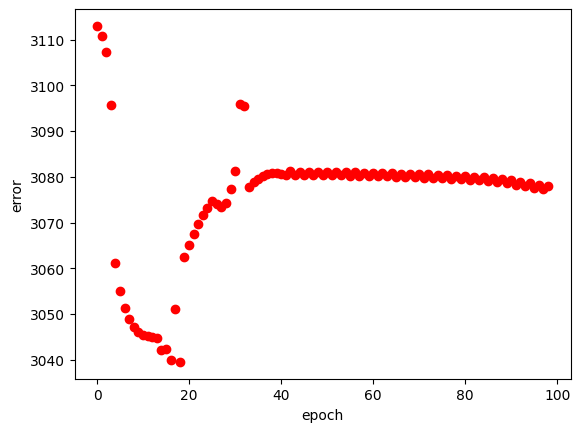

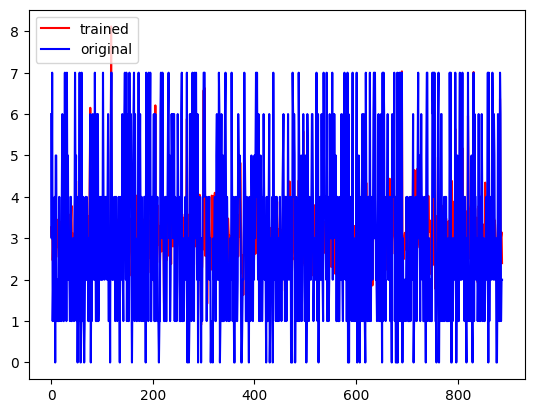

In [4]:
# Train and evaluate ANFIS
mf = [
        # obj_score
        [['gaussmf', {'mean': 0.68, 'sigma': 0.15}],
        ['gaussmf', {'mean': 0.86, 'sigma': 0.15}]],

        # joy_score
        [['gaussmf', {'mean': 0.02, 'sigma': 0.08}],
        ['gaussmf', {'mean': 0.1, 'sigma': 0.08}]],

        # sadness_mei
        [['gaussmf', {'mean': 0.1, 'sigma': 0.27}],
        ['gaussmf', {'mean': 0.4, 'sigma': 0.27}]],

        # vader_neg
        [['gaussmf', {'mean': 0.05, 'sigma': 0.12}],
        ['gaussmf', {'mean': 0.13, 'sigma': 0.12}]],

        # vader_neu
        [['gaussmf', {'mean': 0.7, 'sigma': 0.16}],
        ['gaussmf', {'mean': 0.9, 'sigma': 0.16}]],

        # vader_pos
        [['gaussmf', {'mean': 0.05, 'sigma': 0.14}],
        ['gaussmf', {'mean': 0.2, 'sigma': 0.14}]]
    ]

anfis_model, _ = doAnfis(X_train, X_test, Y_train, Y_test, 100, mf)

Processing:   0%|          | 0/20 [00:00<?, ?it/s]

current error: 3112.9875608831944


Processing:   5%|▌         | 1/20 [00:52<16:46, 52.98s/it]

current error: 3110.8478497981173


Processing:  10%|█         | 2/20 [01:47<16:05, 53.61s/it]

current error: 3107.3685996029753


Processing:  15%|█▌        | 3/20 [02:44<15:39, 55.24s/it]

current error: 3095.613922906943


Processing:  20%|██        | 4/20 [03:38<14:35, 54.70s/it]

current error: 3061.271507846387


Processing:  25%|██▌       | 5/20 [04:32<13:37, 54.50s/it]

current error: 3055.068207086483


Processing:  30%|███       | 6/20 [05:26<12:40, 54.31s/it]

current error: 3051.3182618131345


Processing:  35%|███▌      | 7/20 [06:20<11:45, 54.30s/it]

current error: 3048.8598201029436


Processing:  40%|████      | 8/20 [07:14<10:50, 54.21s/it]

current error: 3047.1995686476735


Processing:  45%|████▌     | 9/20 [08:09<09:59, 54.46s/it]

current error: 3046.1178072041794


Processing:  50%|█████     | 10/20 [09:04<09:06, 54.63s/it]

current error: 3045.4920398393433


Processing:  55%|█████▌    | 11/20 [09:58<08:10, 54.45s/it]

current error: 3045.1880724996904


Processing:  60%|██████    | 12/20 [10:52<07:14, 54.33s/it]

current error: 3045.0380864660196


Processing:  65%|██████▌   | 13/20 [11:46<06:19, 54.28s/it]

current error: 3044.709439578326


Processing:  70%|███████   | 14/20 [12:41<05:26, 54.34s/it]

current error: 3042.1089469596736


Processing:  75%|███████▌  | 15/20 [13:35<04:31, 54.28s/it]

current error: 3042.2713891855497


Processing:  80%|████████  | 16/20 [14:29<03:36, 54.21s/it]

current error: 3039.9405994218732


Processing:  85%|████████▌ | 17/20 [15:23<02:42, 54.31s/it]

current error: 3051.0137521261995


Processing:  90%|█████████ | 18/20 [16:18<01:48, 54.26s/it]

current error: 3039.5477795214965


Processing:  95%|█████████▌| 19/20 [17:12<00:54, 54.33s/it]


Accuracy: 17.12%


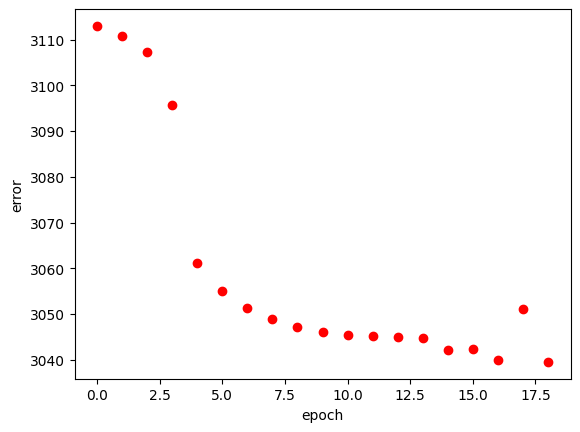

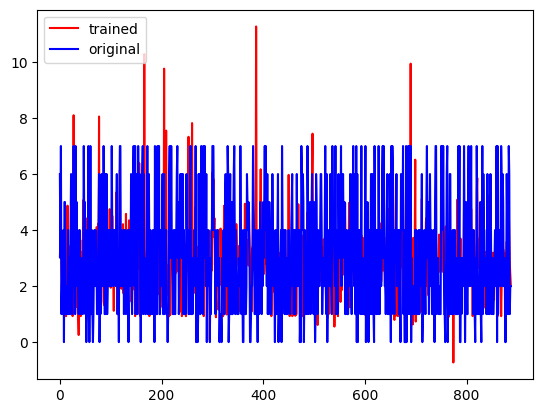

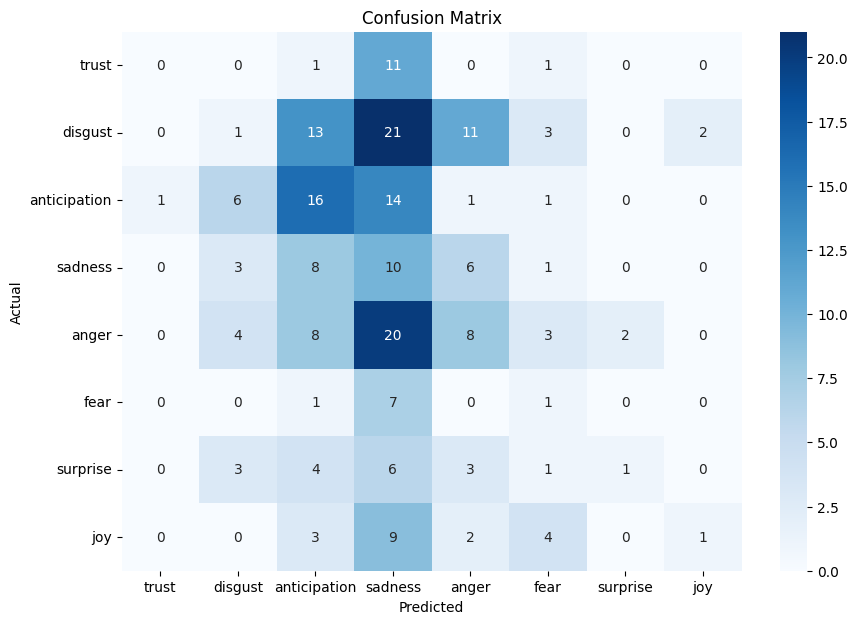

In [5]:
mf = [
        # obj_score
        [['gaussmf', {'mean': 0.68, 'sigma': 0.15}],
        ['gaussmf', {'mean': 0.86, 'sigma': 0.15}]],

        # joy_score
        [['gaussmf', {'mean': 0.02, 'sigma': 0.08}],
        ['gaussmf', {'mean': 0.1, 'sigma': 0.08}]],

        # sadness_mei
        [['gaussmf', {'mean': 0.1, 'sigma': 0.27}],
        ['gaussmf', {'mean': 0.4, 'sigma': 0.27}]],

        # vader_neg
        [['gaussmf', {'mean': 0.05, 'sigma': 0.12}],
        ['gaussmf', {'mean': 0.13, 'sigma': 0.12}]],

        # vader_neu
        [['gaussmf', {'mean': 0.7, 'sigma': 0.16}],
        ['gaussmf', {'mean': 0.9, 'sigma': 0.16}]],

        # vader_pos
        [['gaussmf', {'mean': 0.05, 'sigma': 0.14}],
        ['gaussmf', {'mean': 0.2, 'sigma': 0.14}]]
    ]

anfis_model_2, predictions_2 = doAnfis(X_train, X_test, Y_train, Y_test, 20, mf)

cm = confusion_matrix(Y_test, predictions_2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [17]:
print(processed_data['Emotion_mapped'].unique())
print(mapping_dict)
print(predictions_2)

[0 1 2 3 4 5 6 7]
{'trust': 0, 'disgust': 1, 'anticipation': 2, 'sadness': 3, 'anger': 4, 'fear': 5, 'surprise': 6, 'joy': 7}
[3 3 3 3 3 3 5 4 6 4 3 1 3 3 3 7 4 3 3 3 3 3 3 3 5 3 4 3 3 3 3 3 2 2 3 3 3
 4 0 2 3 3 3 1 3 3 4 3 3 3 5 3 5 3 3 3 3 3 3 2 0 3 0 2 3 2 2 3 3 5 3 3 3 3
 3 3 3 3 7 3 3 4 3 4 3 3 3 3 4 4 0 3 3 7 7 4 3 3 6 3 3 3 3 3 2 0 3 5 0 3 3
 3 2 3 2 1 2 3 3 4 3 3 3 0 3 3 3 6 4 3 3 3 2 4 3 2 3 1 3 3 3 3 3 3 3 4 3 3
 4 5 3 3 4 4 4 3 3 5 4 4 3 2 3 3 4 3 3 3 3 2 4 3 3 5 3 3 3 3 3 3 3 1 3 3 1
 1 3 3 1 4 3 3 3 3 1 2 3 3 5 3 3 3 3 3 3 3 3 2 3 4 3 3 2 0 2 3 2 6 2 3 3 3]


# Manual Feature selection

In [59]:
# Features to keep for the fuzzy system
to_keep = ['afinn_score','polarity_score','sarcasm_score','vader_neu','obj_score','irony_score']

# Subset the dataframe for input features
fuzzy_data = processed_data[to_keep]

# Mapping the target variable (Emotion) to numeric values
mapping_dict = {value: index for index, value in enumerate(processed_data['Emotion'].unique())}
processed_data['Emotion_mapped'] = processed_data['Emotion'].map(mapping_dict)

# Input (X) and Target (Y) variables
X = fuzzy_data.values
Y = processed_data['Emotion_mapped'].values

# Split the data into training and testing sets using train_test_split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

current error: 2755.537445680623


current error: 2895.9467314407593


current error: 2887.013160587432


current error: 2826.724544546414


current error: 2731.664450033254


current error: 3038.1960842830804


current error: 2769.1473521961207


current error: 3057.76063911529


current error: 3061.261286137664


current error: 3061.3158814221624


current error: 3061.315833285879


current error: 3061.3363609638054


current error: 3061.5825528151963


current error: 3063.7016623643894


current error: 3068.3558234385346


current error: 3071.9955293373487


current error: 3075.25261365298


current error: 3078.1754344587025


current error: 3080.756167846912



Processing:  95%|█████████▌| 19/20 [17:26<00:55, 55.08s/it]


Accuracy: 13.06%


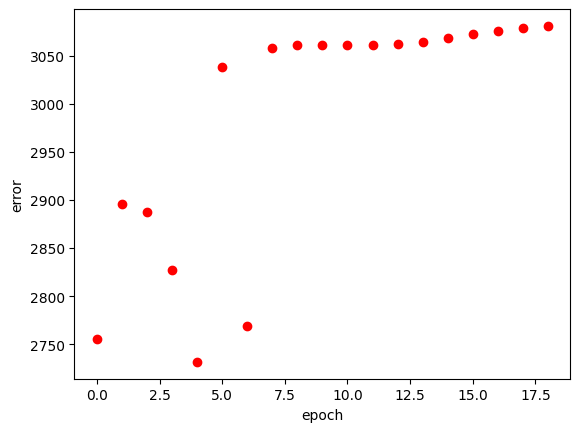

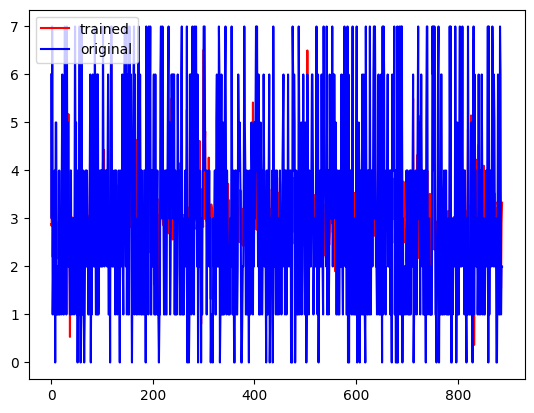

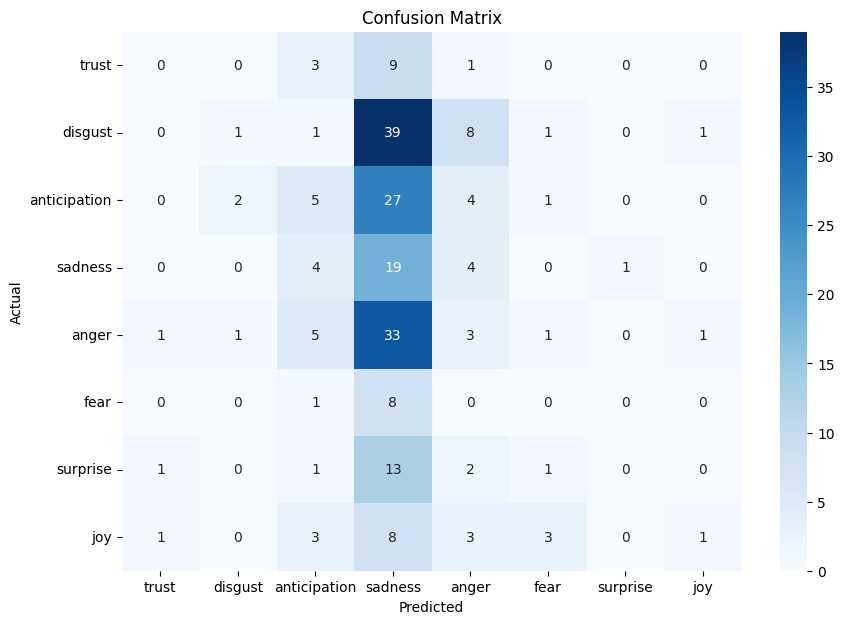

In [62]:
mf = [
    # afinn_score
    [['gaussmf', {'mean': -1.0, 'sigma': 4.1}],
     ['gaussmf', {'mean': 2.0, 'sigma': 4.1}]],

    # polarity_score
    [['gaussmf', {'mean': 0.32, 'sigma': 0.05}],
     ['gaussmf', {'mean': 0.37, 'sigma': 0.05}]],

    # sarcasm_score
    [['gaussmf', {'mean': 0.47, 'sigma': 0.005}],
     ['gaussmf', {'mean': 0.50, 'sigma': 0.005}]],

    # vader_neu
    [['gaussmf', {'mean': 0.7, 'sigma': 0.17}],
     ['gaussmf', {'mean': 0.9, 'sigma': 0.17}]],

    # obj_score
    [['gaussmf', {'mean': 0.68, 'sigma': 0.15}],
     ['gaussmf', {'mean': 0.86, 'sigma': 0.15}]],

    # irony_score
    [['gaussmf', {'mean': 0.10, 'sigma': 0.23}],
     ['gaussmf', {'mean': 0.45, 'sigma': 0.23}]]
]


anfis_model_3, predictions_3 = doAnfis(X_train, X_test, Y_train, Y_test, 20, mf)

cm = confusion_matrix(Y_test, predictions_3)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=mapping_dict.keys(), yticklabels=mapping_dict.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Why a Mix of MFs Can Be Beneficial:
sigmf:
Ideal for sharp transitions or binary-like variables (e.g., "none" vs. "some").
Use when you want to model a sudden shift from one state to another (e.g., exclamations going from 0 to higher values).
gaussmf:
Well-suited for variables with a continuous, smooth, symmetric distribution (e.g., objective scores, joy scores).
Works well for cases where the spread of the data is relatively consistent.
gbellmf:
Offers flexibility in controlling both the steepness and spread of the MF, making it useful for features where the transition is gradual but not perfectly symmetrical.
Use this when you need finer control over how quickly a variable transitions from low to high, especially when the data shows asymmetry or varying slopes in different regions.
Revisiting Your Data Table and Potential MF Mix:
Let’s analyze the data and determine where each MF type would be most appropriate.

Data Summary:

| Feature | Description | Potential MF Type |
| -------- | ------- | ------- |
|exclamation_score | Most data is clustered at 0, with occasional high values | sigmf for sharp transition from none to some |
|question_score | Most data at 0, but occasional jumps to higher values | sigmf or gbellmf for smooth transition |
|obj_score | Relatively continuous data between 0.68 and 1 | gaussmf for smooth continuous modeling |
|joy_score | Data primarily at 0, but extends towards 1 | sigmf for the 0-to-some transition and gaussmf for the upper range |
|vader_neg | Some data near 0 with gradual increase to 1 | gbellmf or gaussmf to handle gradual transitions |
|vader_pos | Similar to vader_neg, mostly low values but gradual increase to 1 | gbellmf for flexibility in transition | 



exclamation_score (sigmf):
Since the data is mostly 0 but jumps to higher values, a sharp transition is appropriate here.

question_score (sigmf or gbellmf):
Similar to exclamation_score, but if the transition isn’t as sharp, a gbellmf can provide more control over how smooth the transition is.

obj_score (gaussmf):
Since the data has a continuous spread, a gaussmf is well-suited for modeling this smoothly.

joy_score (sigmf + gaussmf):
Most data is 0, so a sigmf can handle the sharp transition from no joy to some joy, followed by a gaussmf for modeling the upper end of the distribution.

vader_neg (gbellmf or gaussmf):
Since there’s a gradual increase from neutral to strong negativity, a gbellmf can give you more control over the transition, but a gaussmf may work too if the data is smooth enough.

vader_pos (gbellmf):
Same rationale as vader_neg—gradual transition from neutral to positive sentiment, best modeled with a gbellmf for flexibility.


Based on the summary statistics we created for each of the six features, we can tailor the membership functions (MFs) for the fuzzy system. The goal is to capture the distribution of each feature effectively by setting appropriate mean and sigma values for Gaussian membership functions.


	    exclamation_score	question_score	obj_score	joy_score	vader_neg	vader_pos
count	1110.000000	        1110.000000	    1110.000000	1110.000000	1110.000000	1110.000000
mean	0.065042	        0.042836	    0.764637	0.044619	0.086072	0.123200
std	    0.231353	        0.184856	    0.146033	0.085424	0.119278	0.137306
min	    0.000000	        0.000000	    0.000000	0.000000	0.000000	0.000000
25%	    0.000000	        0.000000	    0.680783	0.000000	0.000000	0.000000
50%	    0.000000	        0.000000	    0.775212	0.000000	0.046000	0.099000
75%	    0.000000	        0.013289	    0.861111	0.064516	0.131000	0.177750
max	    3.000000	        4.000000	    1.000000	1.000000	1.000000	1.000000


General Approach:
Mean (mean): Set based on typical values such as quartiles or based on the distribution's central tendency (e.g., mean or median).
Sigma (sigma): Set based on the spread of the data, using standard deviation or a fraction of the feature range.


1. exclamation_score
Range: [0, 3] with most data around 0 (75% of the data has a value of 0).
Mean: You might consider separating between "no exclamations" and "has exclamations". Set one MF around 0 for the bulk of the data and another around the mean or a higher value for rare instances of multiple exclamations.
Sigma: Based on the standard deviation (0.23), choose a moderate width for the Gaussians.

2. question_score
Range: [0, 4], with most data around 0 (median and 75% are 0).
Mean: Similar to exclamation_score, most data is 0. So, you can have one MF around 0 and another around the mean or a larger value.
Sigma: The standard deviation is 0.18, so the spread should reflect this.

3. obj_score
Range: [0, 1], with mean 0.76, most data between 0.68 and 0.86.
Mean: Since this feature seems to be concentrated in the higher range (close to 1), you could have MFs representing low, medium, and high scores.
Sigma: With a standard deviation of 0.15, MFs should have moderate overlap.

4. joy_score
Range: [0, 1], with most data clustered around 0 (50% of the data is 0, mean is 0.044).
Mean: You can have one MF for "no joy" around 0 and another for "presence of joy" closer to 1.
Sigma: Standard deviation is 0.085, so use small spread.

5. vader_neg (Negative sentiment)
Range: [0, 1], with most data concentrated at 0, but there's a small tail up to 1.
Mean: Have one MF around 0 for neutral sentiment, and another for stronger negative sentiment around 1.
Sigma: Standard deviation is 0.12, so a relatively narrow spread can be used.

6. vader_pos (Positive sentiment)
Range: [0, 1], mean is 0.12, with most data below 0.18.
Mean: Have one MF for neutral sentiment around 0, and another for positive sentiment closer to 1.
Sigma: Similar to vader_neg, standard deviation is 0.14, so a narrow spread can be used.

Explanation:
exclamation_score and question_score: Since most values are 0, we use two MFs to separate "no exclamation/question" from "some exclamations/questions".
obj_score: A higher range, and since values cluster around 0.76, we have three MFs representing low, medium, and high objectivity.
joy_score, vader_neg, and vader_pos: These use two or three MFs to represent "none", "some", and "strong" joy/negativity/positivity.
This setup gives a good balance between capturing the typical range and outliers in your dataset.